In [1]:
#This Projet analyses the demographic distribution of athletes in the PARIS 2024 Olympics

In [77]:
#import all librarires needed for this analyses 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [78]:
#read data in csv
athlete_data=pd.read_csv(r'C:\Users\user\Downloads\archive (2)\athletes new.csv')

In [79]:
#quick overview of dataset
athlete_data

,code,name,name_short,name_tv,gender,function,country_code,country,country_full,nationality,nationality_full,nationality_code,height,weight,disciplines,events,birth_date
0,1535420,VALENCIA Alejandra,VALENCIA A,Alejandra VALENCIA,Female,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Women's Individual"", ""Women's Team"", 'Mixed ...",1994-10-17
1,1535429,RUIZ Angela,RUIZ A,Angela RUIZ,Female,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Women's Individual"", ""Women's Team""]",2006-07-28
2,1535430,GRANDE Matias,GRANDE M,Matias GRANDE,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Men's Individual"", ""Men's Team"", 'Mixed Team']",2004-04-26
3,1536460,ROJAS Carlos,ROJAS C,Carlos ROJAS,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Men's Individual"", ""Men's Team""]",2000-01-14
4,1536467,MARTINEZ WING Bruno,MARTINEZ WING B,Bruno MARTINEZ WING,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Men's Individual"", ""Men's Team""]",1998-03-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11110,1981775,SULEYMANOV Sanan,SULEYMANOV S,Sanan SULEYMANOV,Male,Athlete,AZE,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,AZE,0,0.0,['Wrestling'],"[""Men's Greco-Roman 77kg""]",1996-12-15
11111,1981785,MAGOMEDOV Magomedkhan,MAGOMEDOV M,Magomedkhan MAGOMEDOV,Male,Athlete,AZE,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,AZE,0,0.0,['Wrestling'],"[""Men's Freestyle 97kg""]",1998-01-27
11112,2008688,SACULTAN Maxim,SACULTAN M,Maxim SACULTAN,Male,Athlete,MDA,Republic of Moldova,Republic of Moldova,Republic of Moldova,Republic of Moldova,MDA,0,0.0,['Wrestling'],"[""Men's Freestyle 65kg""]",1996-11-18
11113,3429662,VALIEV Chermen,VALIEV C,Chermen VALIEV,Male,Athlete,ALB,Albania,Albania,Albania,Albania,ALB,0,0.0,['Wrestling'],"[""Men's Freestyle 74kg""]",1998-12-10


In [80]:
#view column datatypes

athlete_data.dtypes

code                  int64
name                 object
name_short           object
name_tv              object
gender               object
function             object
country_code         object
country              object
country_full         object
nationality          object
nationality_full     object
nationality_code     object
height                int64
weight              float64
disciplines          object
events               object
birth_date           object
dtype: object

In [81]:
#Check for missing values

athlete_data.isnull().sum()

code                 0
name                 0
name_short           0
name_tv              0
gender               0
function             0
country_code         0
country              0
country_full         0
nationality          0
nationality_full     0
nationality_code     0
height               0
weight              16
disciplines          0
events               0
birth_date           0
dtype: int64

In [82]:
# drop height, weight, name_tv, nationality_full and country_full columns as they either repeated or redundant

athlete_data=athlete_data.drop(columns=['height', 'weight','country_full','name_tv','nationality_full'])

In [83]:
athlete_data.head(5)

,code,name,name_short,gender,function,country_code,country,nationality,nationality_code,disciplines,events,birth_date
0,1535420,VALENCIA Alejandra,VALENCIA A,Female,Athlete,MEX,Mexico,Mexico,MEX,['Archery'],"[""Women's Individual"", ""Women's Team"", 'Mixed ...",1994-10-17
1,1535429,RUIZ Angela,RUIZ A,Female,Athlete,MEX,Mexico,Mexico,MEX,['Archery'],"[""Women's Individual"", ""Women's Team""]",2006-07-28
2,1535430,GRANDE Matias,GRANDE M,Male,Athlete,MEX,Mexico,Mexico,MEX,['Archery'],"[""Men's Individual"", ""Men's Team"", 'Mixed Team']",2004-04-26
3,1536460,ROJAS Carlos,ROJAS C,Male,Athlete,MEX,Mexico,Mexico,MEX,['Archery'],"[""Men's Individual"", ""Men's Team""]",2000-01-14
4,1536467,MARTINEZ WING Bruno,MARTINEZ WING B,Male,Athlete,MEX,Mexico,Mexico,MEX,['Archery'],"[""Men's Individual"", ""Men's Team""]",1998-03-08


In [84]:
#Ensure that no row is duplicated 
athlete_data[athlete_data.duplicated()]

,code,name,name_short,gender,function,country_code,country,nationality,nationality_code,disciplines,events,birth_date


In [85]:
#Filter dataframe for feature on athletes
athlete_data=athlete_data[athlete_data['function']=='Athlete']
athlete_data.head(5)

,code,name,name_short,gender,function,country_code,country,nationality,nationality_code,disciplines,events,birth_date
0,1535420,VALENCIA Alejandra,VALENCIA A,Female,Athlete,MEX,Mexico,Mexico,MEX,['Archery'],"[""Women's Individual"", ""Women's Team"", 'Mixed ...",1994-10-17
1,1535429,RUIZ Angela,RUIZ A,Female,Athlete,MEX,Mexico,Mexico,MEX,['Archery'],"[""Women's Individual"", ""Women's Team""]",2006-07-28
2,1535430,GRANDE Matias,GRANDE M,Male,Athlete,MEX,Mexico,Mexico,MEX,['Archery'],"[""Men's Individual"", ""Men's Team"", 'Mixed Team']",2004-04-26
3,1536460,ROJAS Carlos,ROJAS C,Male,Athlete,MEX,Mexico,Mexico,MEX,['Archery'],"[""Men's Individual"", ""Men's Team""]",2000-01-14
4,1536467,MARTINEZ WING Bruno,MARTINEZ WING B,Male,Athlete,MEX,Mexico,Mexico,MEX,['Archery'],"[""Men's Individual"", ""Men's Team""]",1998-03-08


# GENDER DISTRIBUTION OF ATHLETES

In [86]:
gender_count = athlete_data['gender'].value_counts()

In [87]:
gender_percentage = ((gender_count/gender_count.sum())*100).reset_index(name='Percentage')

In [88]:
gender_percentage

,gender,Percentage
0,Male,50.970696
1,Female,49.029304


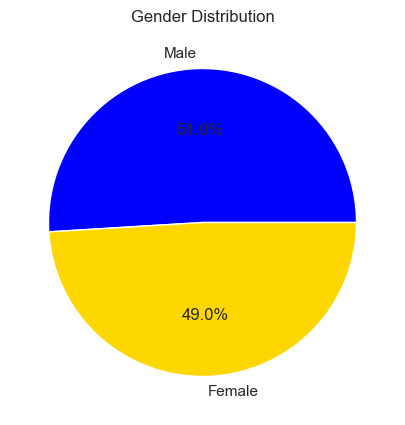

In [89]:
plt.figure(figsize=(8,5))
plt.pie(gender_percentage['Percentage'], labels= ['Male', 'Female'], colors=['blue','gold'],autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

# AGE DISTRIBUTION OF ATHLETES

In [90]:
#Create a column foe age of each athlete
athlete_data['Age']= (datetime.datetime.now()-pd.to_datetime(athlete_data['birth_date'])).dt.days//365.25

In [91]:
athlete_data.head(5)

,code,name,name_short,gender,function,country_code,country,nationality,nationality_code,disciplines,events,birth_date,Age
0,1535420,VALENCIA Alejandra,VALENCIA A,Female,Athlete,MEX,Mexico,Mexico,MEX,['Archery'],"[""Women's Individual"", ""Women's Team"", 'Mixed ...",1994-10-17,29.0
1,1535429,RUIZ Angela,RUIZ A,Female,Athlete,MEX,Mexico,Mexico,MEX,['Archery'],"[""Women's Individual"", ""Women's Team""]",2006-07-28,18.0
2,1535430,GRANDE Matias,GRANDE M,Male,Athlete,MEX,Mexico,Mexico,MEX,['Archery'],"[""Men's Individual"", ""Men's Team"", 'Mixed Team']",2004-04-26,20.0
3,1536460,ROJAS Carlos,ROJAS C,Male,Athlete,MEX,Mexico,Mexico,MEX,['Archery'],"[""Men's Individual"", ""Men's Team""]",2000-01-14,24.0
4,1536467,MARTINEZ WING Bruno,MARTINEZ WING B,Male,Athlete,MEX,Mexico,Mexico,MEX,['Archery'],"[""Men's Individual"", ""Men's Team""]",1998-03-08,26.0


In [92]:
 # View the distribution of age using the describe method
Age_distribution =athlete_data['Age'].describe()

In [93]:
 Age_distribution

count    10920.000000
mean        26.594597
std          5.333878
min         12.000000
25%         23.000000
50%         26.000000
75%         30.000000
max         65.000000
Name: Age, dtype: float64

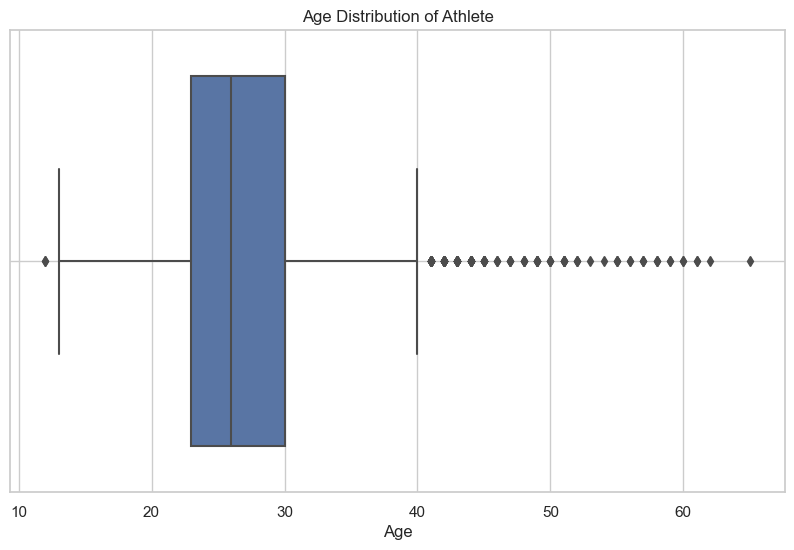

In [94]:
plt.figure(figsize=(10,6))
sns.boxplot(x=athlete_data['Age'])
plt.title('Age Distribution of Athlete' )
plt.xlabel('Age')
plt.grid(True)
plt.show()


# ANALYSIS OF COUNTRY REPRESENTATION

In [95]:
Total_ountries= len(athlete_data['country'].unique())

In [96]:
Total_ountries

206

In [97]:
Top_countries=athlete_data['country'].value_counts()[:15].reset_index(name='No of Athletes')
Top_countries

,country,No of Athletes
0,United States,605
1,France,591
2,Australia,466
3,Germany,441
4,Japan,424
5,Spain,395
6,China,394
7,Italy,388
8,Great Britain,329
9,Canada,322


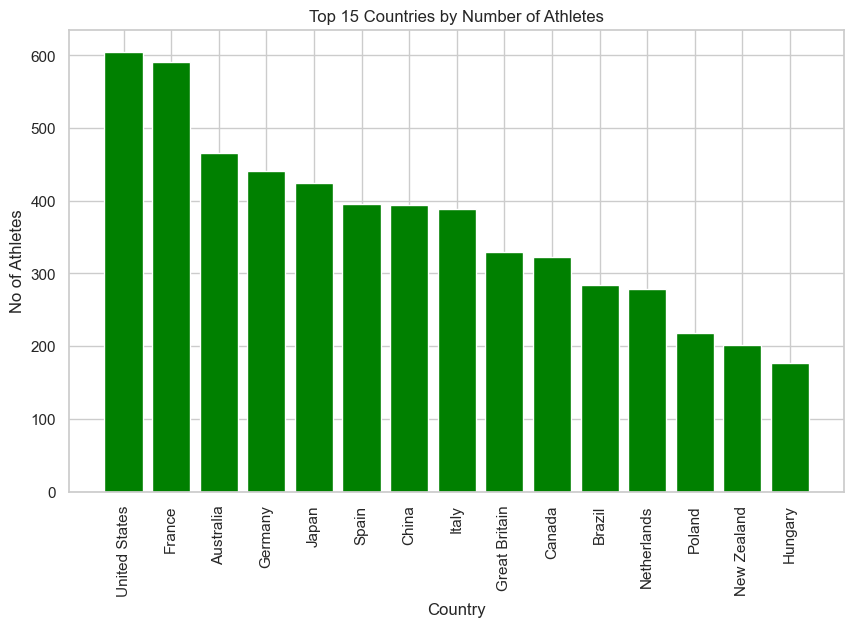

In [98]:
plt.figure(figsize=(10,6))
plt.bar(Top_countries['country'],Top_countries['No of Athletes'],color='green')
plt.title('Top 15 Countries by Number of Athletes')
plt.xlabel('Country')
plt.ylabel('No of Athletes')
plt.xticks(rotation='vertical')
plt.show()

In [100]:
athlete_data.dtypes

code                  int64
name                 object
name_short           object
gender               object
function             object
country_code         object
country              object
nationality          object
nationality_code     object
disciplines          object
events               object
birth_date           object
Age                 float64
dtype: object

# Distribution of Athletes Over Disciplines

In [102]:
#Extract elements from disciplines column
import ast
athlete_data['disciplines']=athlete_data['disciplines'].apply(lambda x:ast.literal_eval(x) if isinstance(x,str) else x)
athlete_data['disciplines']=athlete_data['disciplines'].apply(lambda x:x[0] if isinstance(x,list) else x)
athlete_data['disciplines']

0          Archery
1          Archery
2          Archery
3          Archery
4          Archery
           ...    
11110    Wrestling
11111    Wrestling
11112    Wrestling
11113    Wrestling
11114    Wrestling
Name: disciplines, Length: 10920, dtype: object

In [105]:
#Group data by discipline to determine the count for each discipline
athlete_discipline=athlete_data.groupby('disciplines')['function'].value_counts().reset_index()
athlete_discipline

,disciplines,function,count
0,3x3 Basketball,Athlete,65
1,Archery,Athlete,128
2,Artistic Gymnastics,Athlete,190
3,Artistic Swimming,Athlete,96
4,Athletics,Athlete,1965
5,Badminton,Athlete,175
6,Basketball,Athlete,287
7,Beach Volleyball,Athlete,96
8,Boxing,Athlete,248
9,Breaking,Athlete,33


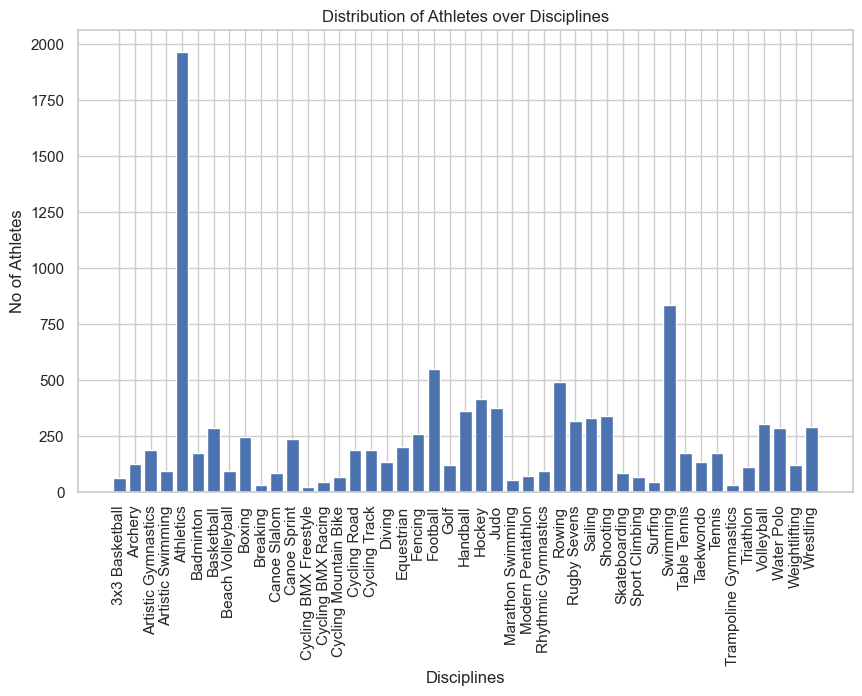

In [106]:
plt.figure(figsize=(10,6))
plt.bar(athlete_discipline['disciplines'],athlete_discipline['count'])
plt.title('Distribution of Athletes over Disciplines')
plt.xticks(rotation='vertical')
plt.xlabel('Disciplines')
plt.ylabel('No of Athletes')
plt.show()

In [115]:
import os
os.chdir(r'C:\Users\user\Jupiter Notebook')

In [116]:
os.getcwd()

'C:\\Users\\user\\Jupiter Notebook'